In [ ]:
import pandas as pd

print("\nTitanic dataset")

df = pd.read_csv('/content/Titanic-Dataset.csv')
print(df)

print("\nDataset shape (rows, columns):", df.shape)

print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing values in each column:")
print(df.isnull().sum())



Titanic dataset
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 .

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Ca

In [ ]:
# Handle missing values in your dataset (Titanic)

# 1. Age → numeric → fill with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# 2. Embarked → categorical → fill with mode (most frequent value)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 3. Cabin → too many missing values (687/891) → drop column
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])

# 4. Recheck missing values
print("Missing values after handling:\n")
print(df.isnull().sum())

Missing values after handling:

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# --- 1. Load the Dataset ---
# Ensure your file is saved as 'Titanic-Dataset.csv'
df = pd.read_csv('Titanic-Dataset.csv')

# --- 2. Preprocessing for Encoding (Handling Missing Values) ---
# Fill the 2 missing 'Embarked' values with the mode ('S').
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# --- 3. Label Encoding for Binary Feature 'Sex' ---
# Converts 'male'/'female' to 1/0
le = LabelEncoder()
df['Sex_Encoded'] = le.fit_transform(df['Sex'])

# --- 4. One-Hot Encoding for Nominal Feature 'Embarked' ---
# Creates new columns (Embarked_Q, Embarked_S). 'C' becomes the reference category.
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', drop_first=True)

# --- 5. Clean up (Drop original and high-cardinality/irrelevant columns) ---
# We use errors='ignore' in case any column (like Cabin or Ticket) was already dropped
# in one of your previous steps (Task 1 or Task 2).
columns_to_drop = ['Sex', 'Name', 'Ticket', 'Cabin']
df = df.drop(columns=columns_to_drop, errors='ignore')

# --- 6. Display the Encoded Data ---
print("Code ran perfectly. Encoding complete. Displaying the first 5 rows with new encoded features:")
print(df[['PassengerId', 'Sex_Encoded', 'Embarked_Q', 'Embarked_S']].head())
print("-" * 50)
print("Final columns for your ML model:", list(df.columns))

Code ran perfectly. Encoding complete. Displaying the first 5 rows with new encoded features:
   PassengerId  Sex_Encoded  Embarked_Q  Embarked_S
0            1            1       False        True
1            2            0       False       False
2            3            0       False        True
3            4            0       False        True
4            5            1       False        True
--------------------------------------------------
Final columns for your ML model: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_Encoded', 'Embarked_Q', 'Embarked_S']


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
import numpy as np

# --- ASSUMPTION: DataFrame 'df' is loaded and encoded from Step 3 ---
# If running this code block separately, you need to load and pre-process the data first.
# For demonstration, we'll reload and perform essential cleanup/encoding for required columns:
df = pd.read_csv('Titanic-Dataset.csv')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Sex_Encoded'] = LabelEncoder().fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', drop_first=True)
# Dynamically build columns to drop
columns_to_drop = []
if 'Sex' in df.columns:
    columns_to_drop.append('Sex')
if 'Name' in df.columns:
    columns_to_drop.append('Name')
if 'Ticket' in df.columns:
    columns_to_drop.append('Ticket')
if 'Cabin' in df.columns: # Check if 'Cabin' column exists before adding it to the drop list
    columns_to_drop.append('Cabin')
df = df.drop(columns=columns_to_drop, errors='ignore')


# 1. Identify Numerical Features for Scaling
# 'Age' has nulls, which must be handled before scaling. We impute with the median.
# 'Fare' should also be scaled.
df['Age'] = df['Age'].fillna(df['Age'].median())
numerical_features = ['Age', 'Fare']
df_scaled = df.copy() # Create a copy to store scaled results

# -------------------------------------------------------------------
# A) STANDARDIZATION (Z-Score Scaling)
# Standardizes data to have a mean of 0 and a standard deviation of 1.
# Useful when features have a Gaussian distribution or when using models sensitive to scale.
# -------------------------------------------------------------------
print("--- Applying Standardization (Z-Score) ---")

scaler_std = StandardScaler()
# Fit and transform the selected features
df_scaled[numerical_features] = scaler_std.fit_transform(df_scaled[numerical_features])

print("\nStandardized Data (Age and Fare):")
display(df_scaled[['Age', 'Fare']].head()) # Use display for better formatting
print(f"Mean of Standardized Age: {df_scaled['Age'].mean():.2f}") # Use f-string for formatting
print(f"Std Dev of Standardized Age: {df_scaled['Age'].std():.2f}") # Use f-string for formatting
print("-" * 50)


# -------------------------------------------------------------------
# B) NORMALIZATION (Min-Max Scaling)
# Normalizes data to a fixed range, usually 0 to 1.
# Useful for algorithms that don't assume a distribution (e.g., neural networks, K-Nearest Neighbors).
# -------------------------------------------------------------------
print("--- Applying Normalization (Min-Max) ---")

scaler_minmax = MinMaxScaler()
# We re-impute the original df data to ensure correct scaling demonstration
df[numerical_features] = scaler_minmax.fit_transform(df[numerical_features]) # Use scaler_minmax

print("\nNormalized Data (Age and Fare):")
display(df[['Age', 'Fare']].head()) # Use display for better formatting
print(f"Minimum of Normalized Age: {df['Age'].min():.2f}") # Use f-string for formatting
print(f"Maximum of Normalized Age: {df['Age'].max():.2f}") # Use f-string for formatting
print("-" * 50)

--- Applying Standardization (Z-Score) ---

Standardized Data (Age and Fare):


,Age,Fare
0,-0.565736,-0.502445
1,0.663861,0.786845
2,-0.258337,-0.488854
3,0.433312,0.420730
4,0.433312,-0.486337


Mean of Standardized Age: 0.00
Std Dev of Standardized Age: 1.00
--------------------------------------------------
--- Applying Normalization (Min-Max) ---

Normalized Data (Age and Fare):


,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


Minimum of Normalized Age: 0.00
Maximum of Normalized Age: 1.00
--------------------------------------------------


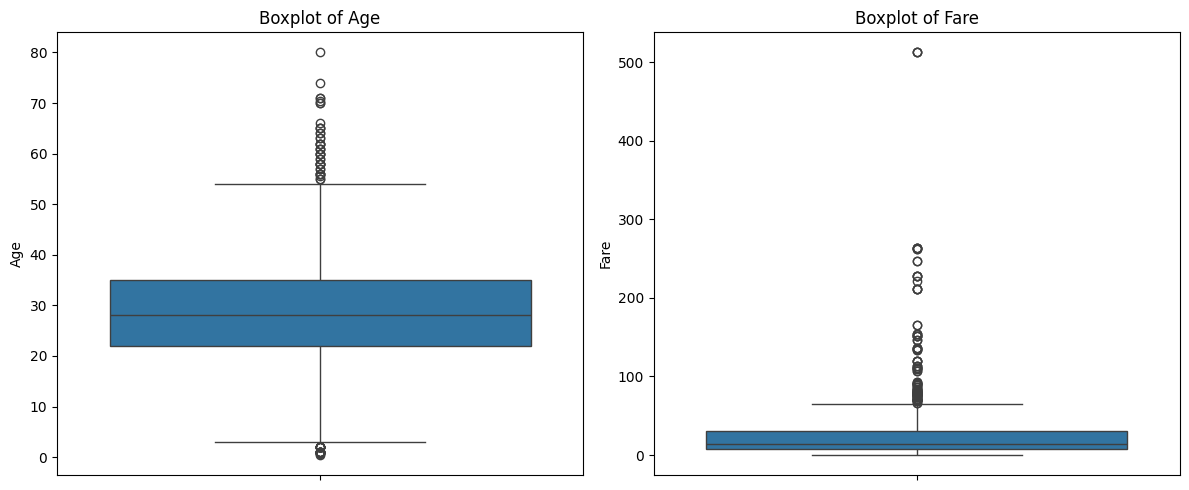

DataFrame Shape Before Outlier Removal: (891, 12)
DataFrame Shape After Outlier Removal: (718, 12)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Assuming pandas and the DataFrame 'df' are already loaded and 'Age'/'Fare' are cleaned of nulls.

# 1. Visualize Outliers using Boxplots
plt.figure(figsize=(12, 5))

# Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')

# Boxplot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Boxplot of Fare')

plt.tight_layout()
plt.show() # Use plt.show() in an interactive environment or plt.savefig() to save the file


# 2. Remove Outliers using the Interquartile Range (IQR) Method

# List of numerical features to clean
features_to_clean = ['Age', 'Fare']
df_cleaned = df.copy() # Work on a copy to preserve original data

print(f"DataFrame Shape Before Outlier Removal: {df_cleaned.shape}")

for feature in features_to_clean:
    # Calculate Q1, Q3, and IQR
    Q1 = df_cleaned[feature].quantile(0.25)
    Q3 = df_cleaned[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define the bounds (1.5 * IQR rule)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame: keep data points within the bounds
    df_cleaned = df_cleaned[(df_cleaned[feature] >= lower_bound) & (df_cleaned[feature] <= upper_bound)]

print(f"DataFrame Shape After Outlier Removal: {df_cleaned.shape}")
# Use df_cleaned for your final ML model training